# Text Classification with Deep Learning vs Machine Learning Approaches

**Developer:**  Mayana Mohsin Khan


## Part 1:  Text Pre Processing with Spacy


 ### Loading Packages
- **numpy** : manuplating data.
- **pandas** : loading and manuplating data.
- **nltk** : preforming vectorization and NLP preprocessing.
- **spacy** : preforming advance NLP.
- **sklearn** : machine learning approcahes.
- **keras** : constructing neural network.
- **matplotlib** : visualizaing the data into graphs.

In [1]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Embedding

import numpy as np 
import pandas as pd
import spacy
import regex as re
import string

from nltk.corpus import stopwords
from nltk import word_tokenize    
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.
C:\Users\Mohsin Khan\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Mohsin Khan\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Mohsin Khan\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

### Loading datasets

The following operations are preformed:
- loading training and testing dataset.
- checking the structure of data using df.info().

**Training data**

In [2]:
# loading the training dataset
df_train = pd.read_csv("axcs_train.csv")
df_train = df_train[['InfoTheory', 'CompVis', 'Math', 'Abstract']]
df_train.head()

,InfoTheory,CompVis,Math,Abstract
0,0,0,0,Nested satisfiability A special case of the s...
1,0,0,0,A note on digitized angles We study the confi...
2,0,0,0,Textbook examples of recursion We discuss pro...
3,0,0,0,Theory and practice The author argues to Sili...
4,0,0,0,Context-free multilanguages This article is a...


In [3]:
df_train.info() #checkingll the structure of training data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54731 entries, 0 to 54730
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   InfoTheory  54731 non-null  int64 
 1   CompVis     54731 non-null  int64 
 2   Math        54731 non-null  int64 
 3   Abstract    54731 non-null  object
dtypes: int64(3), object(1)
memory usage: 1.7+ MB


In [5]:
print('the shape of training: ', df_train.shape)

the shape of training:  (54731, 4)


**Testing data**

In [7]:
# loading the testing dataset
df_test = pd.read_csv("axcs_test.csv")
df_test = df_test[['InfoTheory', 'CompVis', 'Math', 'Abstract']]
df_test = df_test.dropna() 
df_test.head()

,InfoTheory,CompVis,Math,Abstract
0,0.0,0.0,0.0,A Data Transparency Framework for Mobile Appl...
1,0.0,0.0,0.0,A reclaimer scheduling problem arising in coa...
2,0.0,0.0,1.0,Communication-Efficient Distributed Optimizat...
3,0.0,0.0,0.0,Consistent Classification Algorithms for Mult...
4,0.0,0.0,0.0,Managing key multicasting through orthogonal ...


In [8]:
df_test.info() #checking the structure of testing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19678 entries, 0 to 19678
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   InfoTheory  19678 non-null  float64
 1   CompVis     19678 non-null  float64
 2   Math        19678 non-null  float64
 3   Abstract    19678 non-null  object 
dtypes: float64(3), object(1)
memory usage: 768.7+ KB


In [9]:
print('the shape of training: ', df_test.shape)

the shape of training:  (19678, 4)


### Text pre-processing

**Spacy text pre-processing**

This notebook uses spacy to preform basic text precessing using ***en_core_web_sm*** model:
- Lemmination of text using token.lemma_
- removing stopwords from text using token.is_stop

In [35]:
# function to preform basic text pre-porcessing
def cleaning(text):  
    nlp = spacy.load('en_core_web_sm') # loading the spacy model
    doc = nlp(text) # applying the spacy model on text data
    tokens = [token.lemma_ for token in doc if not token.is_stop] # lemmation and removing stop words
    return " ".join(tokens) # return the text 

In [10]:
%%time 
# Cleaning the training Abstract
df_train['Abstract_clean']= df_train.Abstract.apply(lambda x: cleaning(x))
print('Training Data: \n',df_train.head())
print('\n')

Training Data: 
    InfoTheory  CompVis  Math  \
0           0        0     0   
1           0        0     0   
2           0        0     0   
3           0        0     0   
4           0        0     0   

                                            Abstract  \
0   Nested satisfiability A special case of the s...   
1   A note on digitized angles We study the confi...   
2   Textbook examples of recursion We discuss pro...   
3   Theory and practice The author argues to Sili...   
4   Context-free multilanguages This article is a...   

                                      Abstract_clean  
0    nest satisfiability special case satisfiabil...  
1    note digitized angle study configuration pix...  
2    textbook example recursion discuss property ...  
3    theory practice author argue Silicon Valley ...  
4    context - free multilanguage article sketch ...  


Wall time: 54min 41s


In [11]:
# Cleaning the testing Abstract
df_test['Abstract_clean']= df_test.Abstract.apply(lambda x: cleaning(x))
print('Testing Data: \n',df_test.head())

Testing Data: 
    InfoTheory  CompVis  Math  \
0         0.0      0.0   0.0   
1         0.0      0.0   0.0   
2         0.0      0.0   1.0   
3         0.0      0.0   0.0   
4         0.0      0.0   0.0   

                                            Abstract  \
0   A Data Transparency Framework for Mobile Appl...   
1   A reclaimer scheduling problem arising in coa...   
2   Communication-Efficient Distributed Optimizat...   
3   Consistent Classification Algorithms for Mult...   
4   Managing key multicasting through orthogonal ...   

                                      Abstract_clean  
0    Data Transparency Framework Mobile Applicati...  
1    reclaimer scheduling problem arise coal stoc...  
2    communication - Efficient Distributed Optimi...  
3    Consistent Classification Algorithms multi -...  
4    manage key multicasting orthogonal system pa...  


**Keras Text pre-porcessing** 

Using ***Keras*** to tokenize, pre process and convert into sequence the data using the following function:
- **Tokenizer()**: Tokenize the stentence into words.
- **fit_on_texts()**: Convert the words to lovercase, remove punctuation, digits, letters with digits.
- **text_to_sequences()**: Encode the words into sequences that can be used by neural network embeing layer to convert into word embedding.

In [12]:
maxlen = 10 
# Tokenizing
tokenizer = Tokenizer(oov_token = True)
# fitting the tokenizer on text
tokenizer.fit_on_texts(df_train.Abstract_clean)
# converting the words to sequence
X_train = tokenizer.texts_to_sequences(df_train.Abstract_clean)
# usiingpadding to generating dummy values o that all words have equal encoding
X_train = pad_sequences(X_train , padding='post', maxlen=maxlen)
# printing the training words sequence
print('Training tokens sequence: \n', X_train)

Training tokens sequence: 
 [[   47    49  2032 ...   244  2601   130]
 [ 9552  1587    23 ...  2452   400  1105]
 [  341    10   708 ...   313   364  1741]
 ...
 [  828 41526   868 ... 41526    15   880]
 [   26   102   339 ... 19915 16646   267]
 [  111     4   143 ...  3254    12    10]]


In [13]:
# Tokenizing
tokenizer2 = Tokenizer(oov_token = True)
# fitting the tokenizer on text
tokenizer2.fit_on_texts(df_test.Abstract_clean)
# converting the words to sequence
X_test = tokenizer2.texts_to_sequences(df_test.Abstract_clean)
# usiingpadding to generating dummy values o that all words have equal encoding
X_test = pad_sequences(X_test , padding='post', maxlen=maxlen)
# printing the training words sequence
print('Testing tokens sequence: \n', X_test)

Testing tokens sequence: 
 [[ 193   54   22 ...  578  493   95]
 [ 147    2  759 ...  235  131    2]
 [  81  876    2 ... 3721   18  175]
 ...
 [  23 2299   16 ... 1006 3227   54]
 [5505 5536  268 ...   30  157   14]
 [ 457  262  169 ...  646  133 2647]]


Get the size of vocublary, using ***tokenizer.word_index***.

In [14]:
# getting the vocublary
vocab_size = len(tokenizer.word_index) + 1
print('Training Vocublary Size: ',vocab_size)
vocab_size2 = len(tokenizer.word_index) + 1
print('Testing Vovublar size: ', vocab_size2)

Training Vocublary Size:  68807
Testing Vovublar size:  40161


### Part 1: Deep Learning Method

#### Builing a LSTM text classifier using Keras:

- The model is keras ***Sequential model***.
- The layers are added using ***model.add()*** function.
- The model is complied using ***model.compile()*** function.
- The model summary can be printed using the ***model.summary()*** function.

In [28]:
#  lots of Python code here

In [175]:
embedding_dim = 50 # specifying the embedding dimensions
lstm_out = 200 # specifying LSTM output dimesnions

# creating a sequential model
model = Sequential()
# adding the embedding layer
model.add(Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen,
                           dropout = 0.2))
# adding the lstm layer
model.add(LSTM(lstm_out, 
               dropout_U = 0.2, 
               dropout_W = 0.2))
# model.add(layers.Flatten())
# adding the dense layer with relu activation
model.add(Dense(10, 
                activation='relu'))
# adding the output layer with sigmoid activation
model.add(Dense(1, 
                activation='sigmoid'))
# compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# summary of the model
model.summary()

C:\Users\Mohsin Khan\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:10: UserWarning:

The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.

C:\Users\Mohsin Khan\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

Update your `LSTM` call to the Keras 2 API: `LSTM(200, dropout=0.2, recurrent_dropout=0.2)`



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 50)            3440350   
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               200800    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 3,643,171
Trainable params: 3,643,171
Non-trainable params: 0
_________________________________________________________________


**Description of model layers:**
- Embedding layer(): Embedding layer is used to as the base layer which take in the input sequence of words and preforms word embedding. The vocublary size is set to the vocublary size of the training set. the output is of 50 dimesion and is fed into LSTM layer.
- LSTM layer as the second layer of the model which take in the embeded text and processes it and outputs it to the next layer with dimesions of 200.
- Dense layer with 10 output dimesions and using relu activation function.
- Dense layer with 1 dimenstions is used as the output layer.


In [176]:
## Creating the traing and testing labels list
y_train = [df_train.InfoTheory, df_train.CompVis, df_train.Math]
y_test = [df_test.InfoTheory, df_test.CompVis, df_test.Math]

Now that the neural network model is created:
- Fit the model using ***model.fit()*** function.
- Calculate the confusion matrix.
- Calculate the training and testing accuraies and loss error.

In [177]:
# Evaluating the model preformance on training and testing accuracy, loss and confusion matrix
batch_size = 32

## foop though the training a testing labels list
for ytrain, ytest in zip(y_train, y_test):
    ytrain = np.expand_dims(ytrain, axis=-1) # converting the train labesl to sutaible dimensions
    ytest = np.expand_dims(ytest, axis=-1) # converting the train labesl to sutaible dimensions
    # Fitting the model on train data
    model.fit(X_train, ytrain, 
              batch_size = batch_size, 
              nb_epoch = 1, 
              validation_data = (X_test, ytest),
              verbose = False)
    # predictiong the model on test data
    predict  = model.predict(X_test)
    # taking predictions greater then 0.5 
    y_pred = (predict > 0.5)
    print('Neural Network LSTM Classification Model')
    print('Confusion Matrix:')
    # Creating the confusion matrix using testing labels and predictied labels
    cm = confusion_matrix(ytest, y_pred)
    print(cm)
    # Calculating the training accuracies
    loss, accuracy = model.evaluate(X_train, ytrain, verbose=False)
    print('Train Accuracy :', accuracy)
    print('Train % loss: ', loss)
    # Calculating the testing accuracies
    loss, accuracy = model.evaluate(X_test, ytest, verbose=False)
    print('Test Accuracy :', accuracy)
    print('Test % loss: ', loss)
    print('-'*40)

C:\Users\Mohsin Khan\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:13: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Neural Network LSTM Classification Model
Confusion Matrix:
[[14685  1377]
 [ 3222   394]]
Train Accuracy : 0.9279384613037109
Train % loss:  0.19008921547387098
Test Accuracy : 0.7662872076034546
Test % loss:  0.6946898630048483
----------------------------------------


C:\Users\Mohsin Khan\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:13: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Neural Network LSTM Classification Model
Confusion Matrix:
[[17464    62]
 [ 2138    14]]
Train Accuracy : 0.9748405814170837
Train % loss:  0.07180672200800864
Test Accuracy : 0.888200044631958
Test % loss:  0.5302289833545394
----------------------------------------
Neural Network LSTM Classification Model
Confusion Matrix:
[[11471  2277]
 [ 4816  1114]]
Train Accuracy : 0.8672598600387573
Train % loss:  0.32237403102037915
Test Accuracy : 0.6395466923713684
Test % loss:  0.7461339626713053
----------------------------------------


#### Results for Method

Full confusion matrix for method on InfoTheory:

|              | Pred=True | Pred=False |
| -----------  | ----------- | ----------- |
| **Actual=True**  | 55       |   27  |
| **Actual=False** | 34        |   400 |

Full confusion matrix for method on CompVis:

|              | Pred=True | Pred=False |
| -----------  | ----------- | ----------- |
| **Actual=True**  | 55       |   27  |
| **Actual=False** | 34        |   400 |

Full confusion matrix for method on Math:

|              | Pred=True | Pred=False |
| -----------  | ----------- | ----------- |
| **Actual=True**  | 55       |   27  |
| **Actual=False** | 34        |   400 |


### Part 1: Machine Learning Method

Comparing results of various Text Classification algorithms from sklearn package.

Reasons to choose LinearSVM over other randomforest:
- As the data set is all catagorical, LinearSVM is better choice over randomforest which is a multiclass classifier.
- SVM maximizes the margin and thus relies on the distance between different word vectos.
- less strain on memor requirements.

In [19]:
#  lots of Python code here

Create a Lemmination class for for processing using nltk:
- lemmination using ***wordNetLemmatizer*** from **NLTK**.
- tokenization using ***word_tokenizer*** from **NLTK**.

In [11]:
# Preporcessing class
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl=WordNetLemmatizer()
    def __call__(self,doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In the Neural network model, the pre proceesing was done dynamically using keras inbuilld transformation functions. In order to use the processed data we make use of **TfidfVectorizer** from **sklearn** package.

In [12]:
# Vectorizer
vectorizer = TfidfVectorizer(analyzer='word',input='content',
                           lowercase=True,
                           token_pattern='(?u)\\b\\w\\w+\\b',
                           min_df=3,
                           ngram_range=(1,2),
                           tokenizer=LemmaTokenizer())

Fit the vectoriziaer on the training dataset

In [13]:
# Vectorize the training dataset
x_train = vectorizer.fit_transform(df_train.Abstract.tolist())

Fit the vectoriziaer on the testing dataset

In [14]:
# Vectorize the testing dataset
x_test=vectorizer.transform(df_test.Abstract.tolist())

Convert the target columns to list and transform the dimensions using **numpy**.

In [60]:
# Convert the training traget variables and change their dimensions
y_train_InfoTheory = np.asarray(df_train.InfoTheory.tolist())
y_train_CompVis = np.asarray(df_train.CompVis.tolist())
y_train_Math = np.asarray(df_train.Math.tolist())
# Create a list of all target variables
y_train = [y_train_InfoTheory, y_train_CompVis, y_train_Math]

# Convert the testing traget variables and change their dimensions
y_test_InfoTheory = np.asarray(df_test.InfoTheory.tolist())
y_test_CompVis = np.asarray(df_test.CompVis.tolist())
y_test_Math = np.asarray(df_test.Math.tolist())
# Create a list of all target variables
y_test = [y_test_InfoTheory, y_test_CompVis, y_test_Math]

#### Comparing various models:

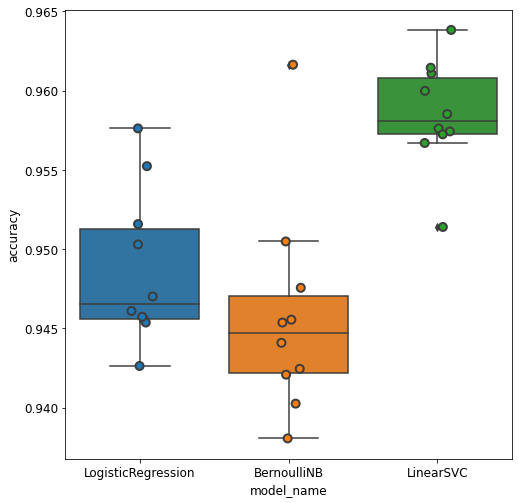

In [65]:
models = [
    LogisticRegression(max_iter=1000),
    BernoulliNB(),
    LinearSVC()
]

## Comparing models for Infotheory
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, x_train, y_train_InfoTheory, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
            
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
#cv_df
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

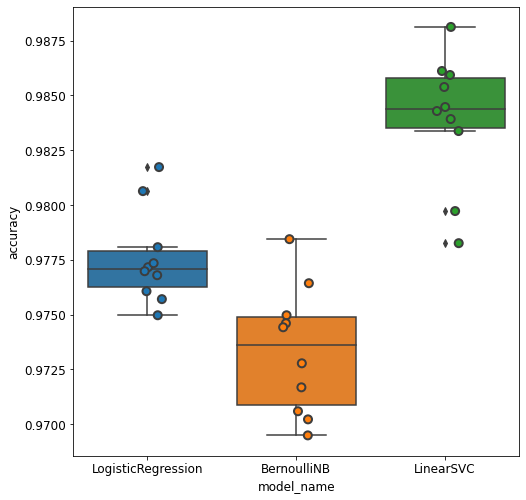

In [67]:
## Comparing models for compVis
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, x_train, y_train_CompVis, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
            
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
#cv_df
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

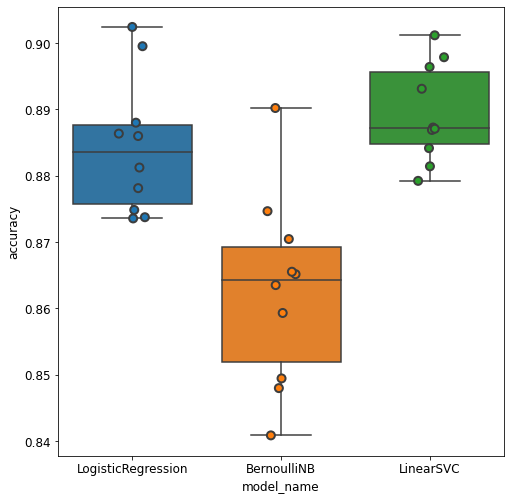

In [68]:
## Comparing models for Math
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, x_train, y_train_Math, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
            
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
#cv_df
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

We can see that LinearSVC text classiier guives us the best accuracy

## Best Model

***def evaluate*** function is used to create and evalaute the model.

In [57]:
# Creating the model
def evaluate(x_train, x_test, y_train, y_test):
    model = LinearSVC() # difining the model
    model.fit(x_train, y_train) # fiting the model on traing data
    y_pred = model.predict(x_test) # predicting the model
    cm = confusion_matrix(y_test,y_pred) # evaluate the confusion matrix
    accuracy = accuracy_score(y_test,y_pred) # eavaluate the model accuracy
    return (cm, accuracy) # return confussion matrix and accuracy

#### Results of Method

Full confusion matrix for method on InfoTheory, etc., as before

In [58]:
## Evaluating the model
for y_train, y_test in zip(y_train, y_test):
    result = evaluate(x_train, x_test, y_train, y_test)
    print("Confussion Matrix: \n", result[0])
    print("Testing Accuracy: ", result[1])
    print('-'*40)

Confussion Matrix: 
 [[15828   234]
 [  613  3003]]
Testing Accuracy:  0.9569570078259986
----------------------------------------
Confussion Matrix: 
 [[17450    76]
 [  498  1654]]
Testing Accuracy:  0.9708303689399329
----------------------------------------
Confussion Matrix: 
 [[12824   924]
 [ 1420  4510]]
Testing Accuracy:  0.880882203475963
----------------------------------------
